In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("TAIPEI_diabetes_Copy.csv",sep=",",index_col="PatientNo")

In [11]:
df.head(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientNo,,,,,,,,,,
1,1354778,0,171,80,34,23,43.509726,1.213191,21,0
2,1147438,8,92,93,47,36,21.240576,0.158365,23,0
3,1640031,7,115,47,52,35,41.511523,0.079019,23,0
4,1883350,9,103,78,25,304,29.582192,1.282870,43,1
5,1424119,1,85,59,27,35,42.604536,0.549542,22,0
6,1619297,0,82,92,9,253,19.724160,0.103424,26,0
7,1660149,0,133,47,19,227,21.941357,0.174160,21,0
8,1458769,0,67,87,43,36,18.277723,0.236165,26,0
9,1201647,8,80,95,33,24,26.624929,0.443947,53,1


In [12]:
df.tail(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientNo,,,,,,,,,,
14991,1220763,5,169,83,31,60,49.004793,0.187397,53,1
14992,1603490,0,114,53,34,40,44.760534,0.143487,23,0
14993,1202654,3,48,60,24,81,29.417154,0.159605,42,1
14994,1165919,1,128,59,21,182,19.766514,0.167280,53,0
14995,1453189,0,72,99,32,32,20.932808,0.545038,22,0
14996,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14997,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14998,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14999,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [13]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [14]:
df[['Pregnancies', 'PlasmaGlucose',	'DiastolicBloodPressure',	'TricepsThickness',	'SerumInsulin',	'BMI',	'DiabetesPedigree','Age']].describe()


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


In [31]:
df.info()  # Check column names, data types, and non-null counts
df.describe()  # Summary statistics for numerical variables
df.head()  # Preview the first few rows of the dataset


<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 1 to 15000
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.3 MB


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientNo,,,,,,,,,,
1,1354778,0,171,80,34,23,43.509726,1.213191,21,0
2,1147438,8,92,93,47,36,21.240576,0.158365,23,0
3,1640031,7,115,47,52,35,41.511523,0.079019,23,0
4,1883350,9,103,78,25,304,29.582192,1.282870,43,1
5,1424119,1,85,59,27,35,42.604536,0.549542,22,0


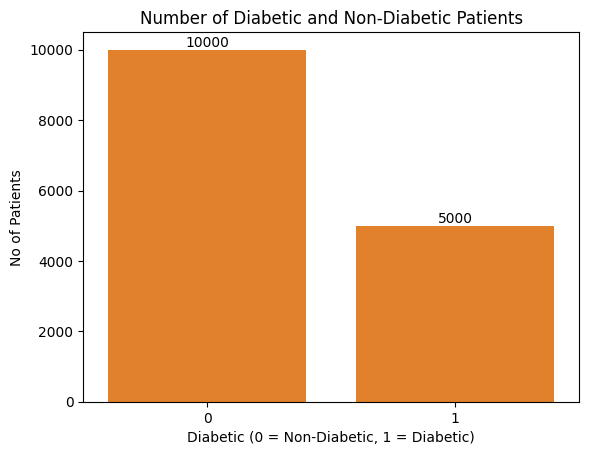

In [16]:
 #Create the count plot
ax = sns.countplot(data=df, x='Diabetic')  # Replace `df` with your DataFrame

# Add numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')  # Show integers on the bars


sns.countplot(data=df, x='Diabetic')
plt.title('Number of Diabetic and Non-Diabetic Patients')
plt.xlabel('Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('No of Patients')
plt.show()


# from the data set we already have more non-diabetic patients this means our model could end up being biased towards non-diabetic diagnosis
# maybe when we split the data for training we may need to somehow consider representaion? 

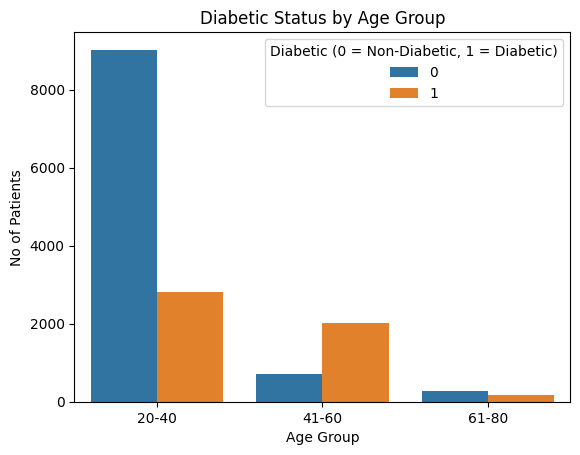

In [17]:
# Create age bins
bins = [20, 40, 60, 80]  # Define age ranges
labels = ['20-40', '41-60', '61-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='AgeGroup', hue='Diabetic')
plt.title('Diabetic Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# Women above 40 are more prevelent to type II diabetics and we see that in the data
# discrepency in the 60+ age group could be due to the less data being available in that age group

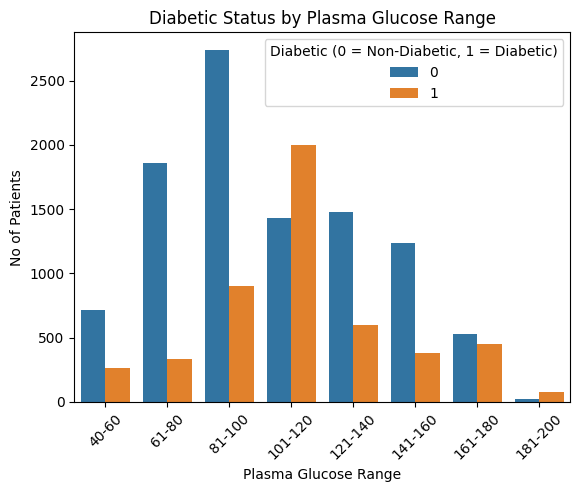

In [18]:
# Create PlasmaGlucose bins
bins = [40, 60, 80, 100, 120, 140, 160, 180, 200]  # Define Plasma Glucose ranges
labels = ['40-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200']
df['RangeofPlasmaGlucose'] = pd.cut(df['PlasmaGlucose'], bins=bins, labels=labels)  # Use a new column

# Plot the count plot with hue
sns.countplot(data=df, x='RangeofPlasmaGlucose', hue='Diabetic')
plt.title('Diabetic Status by Plasma Glucose Range')
plt.xlabel('Plasma Glucose Range')
plt.ylabel('No of Patients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# In the reearch paper they mentioned nothing about the conditions of test but on research this aligns with Fasting Plasma Glucose (FPG)
# Normal: 70–99 mg/dL (3.9–5.5 mmol/L)
# Prediabetes: 100–125 mg/dL (5.6–6.9 mmol/L)
# Diabetes: 126 mg/dL (7.0 mmol/L) or higher on two separate tests
# IM STILL NOT QUITE SURE WITH THIS INTERPRETATION


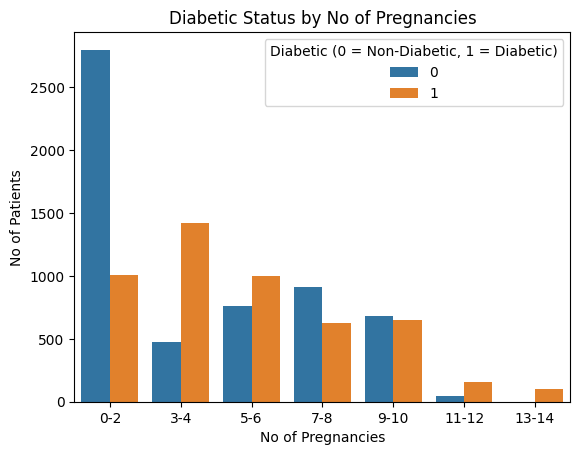

In [19]:

# Create Pregnancies bins
bins = [0, 2, 4, 6, 8, 10, 12, 14]  # Define Pregnancies ranges
labels = ['0-2', '3-4', '5-6', '7-8', '9-10', '11-12', '13-14']
df['NoPregnancies'] = pd.cut(df['Pregnancies'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='NoPregnancies', hue='Diabetic')
plt.title('Diabetic Status by No of Pregnancies')
plt.xlabel('No of Pregnancies')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# The general trend seems to be that diabetes is directly proportional to the number of pregnancis 
# We are observing a positive correlation 

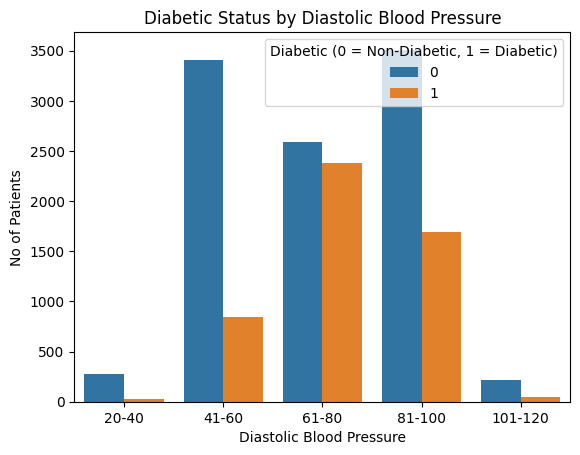

In [49]:

# Create DiastolicBloodPressure bins
bins = [20, 40, 60, 80, 100, 120]  # Define DiastolicBloodPressure ranges
labels = ['20-40', '41-60', '61-80', '81-100', '101-120']
df['DiastolicBloodPressure'] = pd.cut(df['DiastolicBloodPressure'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='DiastolicBloodPressure', hue='Diabetic')
plt.title('Diabetic Status by Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# no patterns observed here as we see less diabetes cases in the 80+ range 

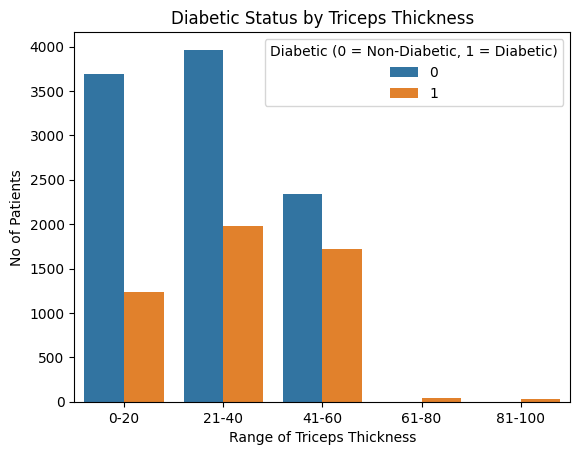

In [20]:
# Create TricepsThickness bins
bins = [0, 20, 40, 60, 80, 100]  # Define DiastolicBloodPressure ranges
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['TricepsThickness'] = pd.cut(df['TricepsThickness'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='TricepsThickness', hue='Diabetic')
plt.title('Diabetic Status by Triceps Thickness')
plt.xlabel('Range of Triceps Thickness')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# triceps thickness is directly proportional to the diabetic status
# this suggests a very strong correlation

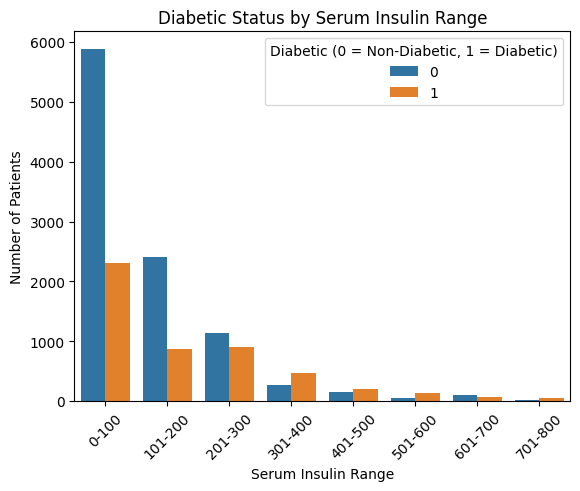

In [52]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800']
df['SerumInsulinRange'] = pd.cut(df['SerumInsulin'], bins=bins, labels=labels)
sns.countplot(data=df, x='SerumInsulinRange', hue='Diabetic')
plt.title('Diabetic Status by Serum Insulin Range')
plt.xlabel('Serum Insulin Range')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# the range of data for the serum insulin was 14 - 799 
# there could be a possibility of outliers
# the serum insulin range is directly proportional to diabetes

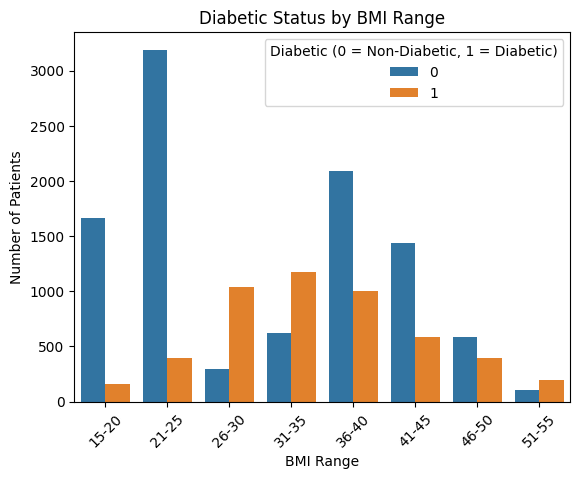

In [54]:
# Define BMI bins and labels
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55]  # Adjust bins as needed
labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55']
df['BMIRange'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='BMIRange', hue='Diabetic')
plt.title('Diabetic Status by BMI Range')
plt.xlabel('BMI Range')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# generally the trend is that as BMI increases so does the proportion of diabetes clients
# with just an exception in the 41-45 range

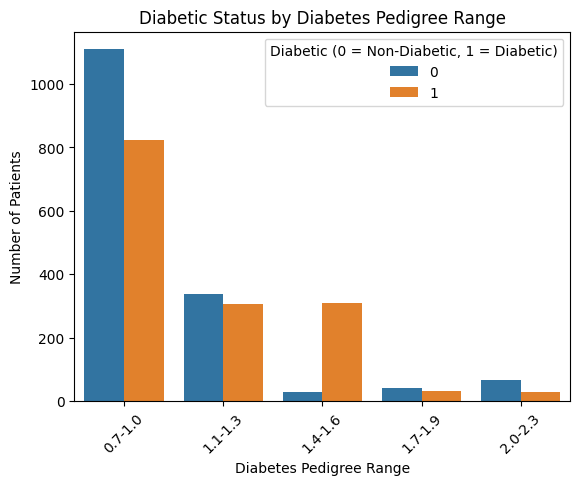

In [55]:
# Define bins and labels for DiabetesPedigree
bins = [0.7, 1.0, 1.3, 1.6, 1.9, 2.3]  # Adjust as needed
labels = ['0.7-1.0', '1.1-1.3', '1.4-1.6', '1.7-1.9', '2.0-2.3']
df['DiabetesPedigreeRange'] = pd.cut(df['DiabetesPedigree'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='DiabetesPedigreeRange', hue='Diabetic')
plt.title('Diabetic Status by Diabetes Pedigree Range')
plt.xlabel('Diabetes Pedigree Range')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# the proportion of being daibetic increases as the diabetes pedigree range increases
# the exceptions is for the higher ranges but it could be due to unavailability of data in those age groups

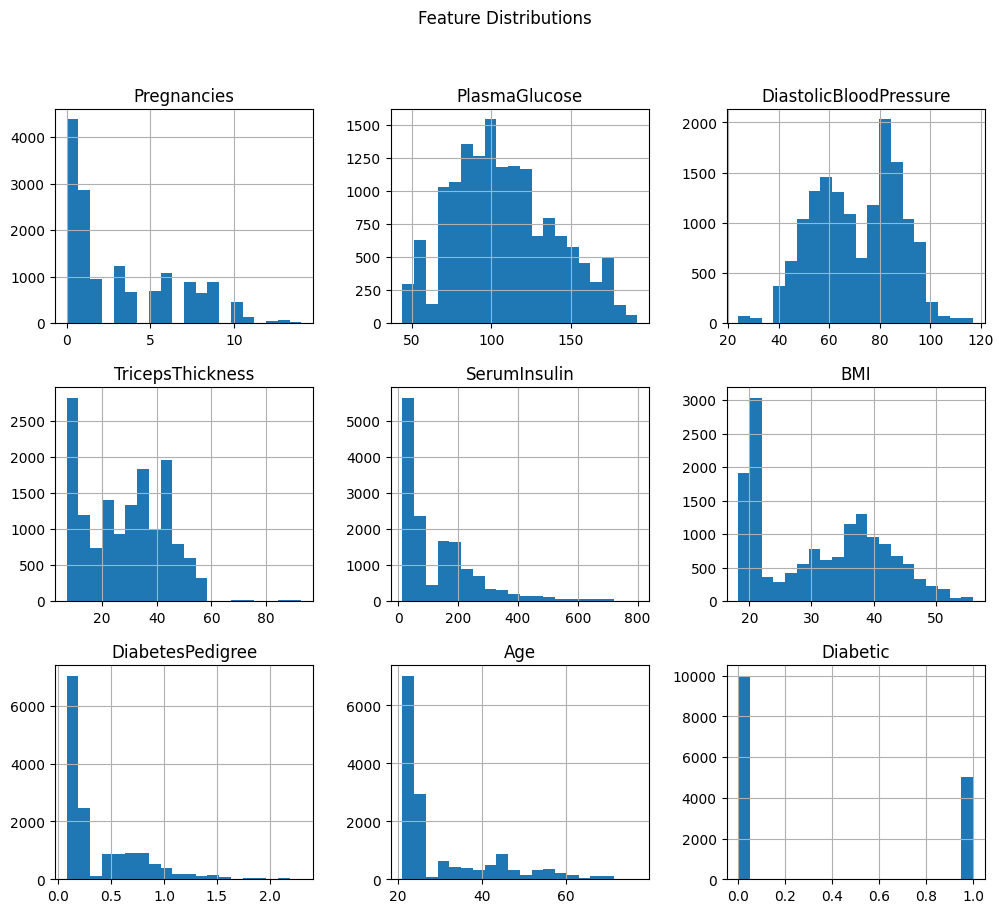

In [43]:
# Histogram for all features
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()


In [27]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation of all numeric features with 'Diabetic'
diabetic_correlation = numeric_df.corr()['Diabetic'].sort_values(ascending=False)
print(diabetic_correlation)


Diabetic                  1.000000
Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
PatientID                -0.012494
Name: Diabetic, dtype: float64


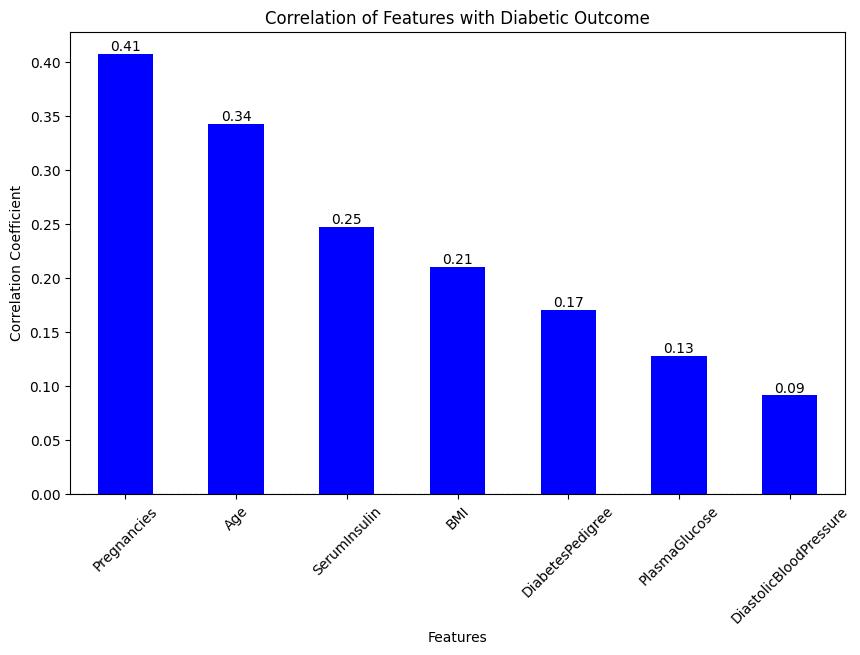

In [38]:
# Remove 'PatientID' and 'Diabetic' from correlation results
if 'PatientID' in diabetic_correlation.index:
    diabetic_correlation = diabetic_correlation.drop(['PatientID'])
if 'Diabetic' in diabetic_correlation.index:
    diabetic_correlation = diabetic_correlation.drop(['Diabetic'])

# Plot the correlation values as a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = diabetic_correlation.plot(kind='bar', color='blue', ax=ax)

# Add correlation values on top of the bars
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",  # Format the value to 2 decimal places
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position the text
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Add labels and titles
plt.title('Correlation of Features with Diabetic Outcome')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xticks(rotation=45)
plt.show()


In [41]:
# Drop the 'PatientID' column from the DataFrame
df = df.drop(columns=['PatientID'])


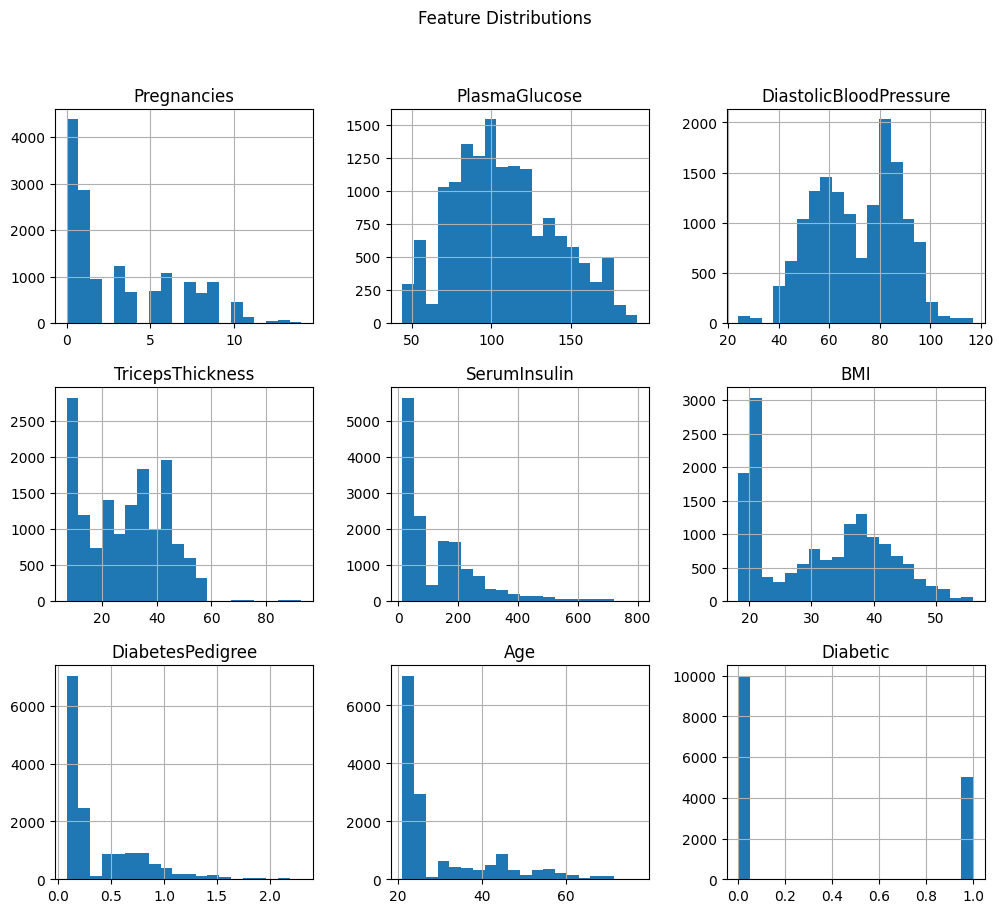

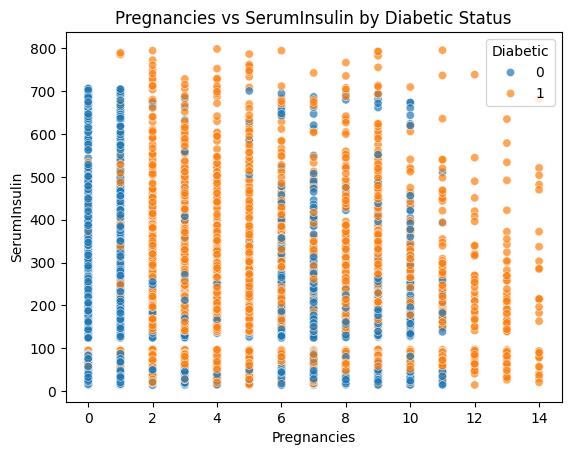

In [47]:
sns.scatterplot(data=df, x='Pregnancies', y='SerumInsulin', hue='Diabetic', alpha=0.7)
plt.title('Pregnancies vs SerumInsulin by Diabetic Status')
plt.show()


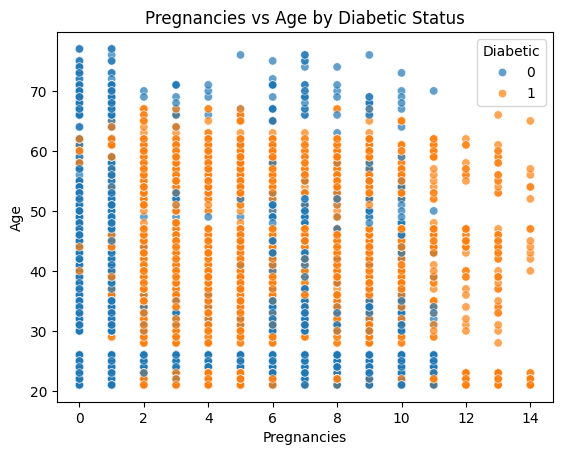

In [46]:
sns.scatterplot(data=df, x='Pregnancies', y='Age', hue='Diabetic', alpha=0.7)
plt.title('Pregnancies vs Age by Diabetic Status')
plt.show()


In [48]:
from scipy.stats import chi2_contingency

In [49]:
df.describe()


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [ ]:
# Target variable
target = 'Diabetic'

# Convert numerical features into categories using binning
features_to_bin = [
    'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness',
    'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'
]

# Define bins for each feature (you can customize these based on your data)
binning = {
    'Pregnancies': [0, 2, 5, 10, 15 float('inf')],
    'PlasmaGlucose': [40, 80, 120, 160, 180, 200 float('inf')],  # Example: Normal, Pre-Diabetic, Diabetic
    'DiastolicBloodPressure': [0, 80, 90, float('inf')],
    'TricepsThickness': [0, 15, 30, float('inf')],
    'SerumInsulin': [0, 100, 200, float('inf')],
    'BMI': [0, 18.5, 25, 30, float('inf')],  # Underweight, Normal, Overweight, Obese
    'DiabetesPedigree': [0, 0.5, 1.0, float('inf')],
    'Age': [0, 30, 50, 70, float('inf')]
}

# Apply binning to each feature
for feature in features_to_bin:
    data[feature + '_bin'] = pd.cut(data[feature], bins=binning[feature], labels=False)

# Perform chi-square test for each binned feature
chi_square_results = []

for feature in features_to_bin:
    feature_bin = feature + '_bin'

    # Create contingency table
    contingency_table = pd.crosstab(data[feature_bin], data[target])

    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Append results
    chi_square_results.append({
        'Feature': feature,
        'Chi-Square': chi2,
        'p-value': p
    })

# Convert results to DataFrame for analysis
chi_square_df = pd.DataFrame(chi_square_results)

# Sort results by p-value
chi_square_df.sort_values(by='p-value', inplace=True)

print(chi_square_df)
